In [26]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml



In [32]:
with open("../config.yml", "r") as ymlfile:
    config = yaml.safe_load(ymlfile)



In [33]:
file1 = open(config['readsFilePath'], 'r')
Lines = file1.readlines()


In [34]:
count = 0
# Strips the newline character
read_lengths = []
counter = 0
sumOfItAll = 0
print(len(Lines)/2)
read_line = False
for line in Lines:
    if(read_line):
        read_line = False
        continue
    else:
        split_line = line.split()
        read_lengths.append(int((split_line[2])[7:]))
        read_line = True
#     if(counter == 50):
#         break
print("average read length: ", sum(read_lengths)/len(read_lengths))
print("max read length: ", max(read_lengths))
print("min read length: ", min(read_lengths))

# print(read_lengths)
#     count += 1
#     print("Line{}: {}".format(count, line.strip()))

188176.0
average read length:  499.09891803418077
max read length:  1006
min read length:  37


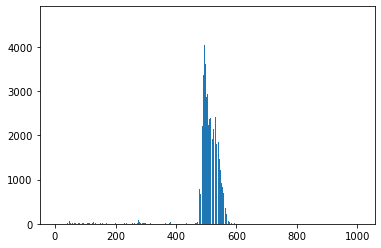

In [35]:
sorted_list = sorted(read_lengths)
sorted_counted = Counter(sorted_list)

range_length = list(range(max(read_lengths))) # Get the largest value to get the range.
data_series = {}

for i in range_length:
    data_series[i] = 0 # Initialize series so that we have a template and we just have to fill in the values.

for key, value in sorted_counted.items():
    data_series[key] = value

data_series = pd.Series(data_series)
x_values = data_series.index

# you can customize the limits of the x-axis
# plt.xlim(0, max(some_list))
plt.bar(x_values, data_series.values)

plt.show()